In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import decomposition
from sklearn.decomposition import FastICA
from sklearn.feature_selection import SelectPercentile as sp
from matplotlib import pyplot
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv("Ovarian.csv")
data

,0.494626,0.263735,0.321841,0.220934,0.297622,0.316458,0.154763,0.223685,0.304346,0.241757,...,0.483622,0.449296,0.449296.1,0.449296.2,0.449296.3,0.449296.4,0.449296.5,0.449296.6,0.449296.7,Normal
0,0.258063,0.406593,0.321841,0.069771,0.333335,0.354432,0.321431,0.144740,0.260869,0.142853,...,0.631765,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,Normal
1,0.537636,0.032966,0.321841,0.209307,0.404762,0.113927,0.369049,0.223685,0.536231,0.131865,...,0.038462,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,Normal
2,0.000000,0.395605,0.310347,0.197673,0.404762,0.455701,0.416666,0.210527,0.420292,0.274723,...,0.497864,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,Normal
3,0.526884,0.395605,0.367817,0.383719,0.488099,0.392405,0.238094,0.500000,0.362316,0.274723,...,0.267096,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,Normal
4,0.397850,0.395605,0.298853,0.372092,0.333335,0.151900,0.428571,0.565794,0.275362,0.395605,...,0.341879,0.333102,0.333102,0.333102,0.333102,0.333102,0.333102,0.333102,0.333102,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.569893,0.681316,0.988506,0.465117,0.690479,0.594937,0.642856,0.842109,0.826085,0.648350,...,0.519231,0.498592,0.498592,0.498592,0.498592,0.498592,0.498592,0.498592,0.498592,Cancer
248,0.569893,0.791209,0.666670,0.651163,0.785715,0.607595,1.000000,0.578952,0.739131,0.648350,...,0.462961,0.450005,0.450005,0.450005,0.450005,0.450005,0.450005,0.450005,0.450005,Cancer
249,0.688175,0.703294,0.655177,0.581398,0.726193,0.772153,0.583334,0.868424,0.768115,0.879119,...,0.527779,0.519718,0.519718,0.519718,0.519718,0.519718,0.519718,0.519718,0.519718,Cancer
250,0.838709,0.824175,0.678164,0.651163,0.809524,0.835442,0.761906,0.842109,0.594200,0.637362,...,0.532050,0.519718,0.519718,0.519718,0.519718,0.519718,0.519718,0.519718,0.519718,Cancer


In [3]:
last_row = data["Normal"]
last_row.replace({"Normal" : 0, "Cancer" : 1}, inplace = True)
last_row

0      0
1      0
2      0
3      0
4      0
      ..
247    1
248    1
249    1
250    1
251    1
Name: Normal, Length: 252, dtype: int64

In [4]:
data.drop("Normal", inplace = True, axis = 1)
data

,0.494626,0.263735,0.321841,0.220934,0.297622,0.316458,0.154763,0.223685,0.304346,0.241757,...,0.467498,0.483622,0.449296,0.449296.1,0.449296.2,0.449296.3,0.449296.4,0.449296.5,0.449296.6,0.449296.7
0,0.258063,0.406593,0.321841,0.069771,0.333335,0.354432,0.321431,0.144740,0.260869,0.142853,...,0.622356,0.631765,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718
1,0.537636,0.032966,0.321841,0.209307,0.404762,0.113927,0.369049,0.223685,0.536231,0.131865,...,0.032870,0.038462,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918
2,0.000000,0.395605,0.310347,0.197673,0.404762,0.455701,0.416666,0.210527,0.420292,0.274723,...,0.495252,0.497864,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621
3,0.526884,0.395605,0.367817,0.383719,0.488099,0.392405,0.238094,0.500000,0.362316,0.274723,...,0.245436,0.267096,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408
4,0.397850,0.395605,0.298853,0.372092,0.333335,0.151900,0.428571,0.565794,0.275362,0.395605,...,0.331628,0.341879,0.333102,0.333102,0.333102,0.333102,0.333102,0.333102,0.333102,0.333102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.569893,0.681316,0.988506,0.465117,0.690479,0.594937,0.642856,0.842109,0.826085,0.648350,...,0.513515,0.519231,0.498592,0.498592,0.498592,0.498592,0.498592,0.498592,0.498592,0.498592
248,0.569893,0.791209,0.666670,0.651163,0.785715,0.607595,1.000000,0.578952,0.739131,0.648350,...,0.460192,0.462961,0.450005,0.450005,0.450005,0.450005,0.450005,0.450005,0.450005,0.450005
249,0.688175,0.703294,0.655177,0.581398,0.726193,0.772153,0.583334,0.868424,0.768115,0.879119,...,0.525931,0.527779,0.519718,0.519718,0.519718,0.519718,0.519718,0.519718,0.519718,0.519718
250,0.838709,0.824175,0.678164,0.651163,0.809524,0.835442,0.761906,0.842109,0.594200,0.637362,...,0.522281,0.532050,0.519718,0.519718,0.519718,0.519718,0.519718,0.519718,0.519718,0.519718


In [5]:
data.isnull().sum().sum()

0

In [6]:
scaler = StandardScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7,8,9,...,15144,15145,15146,15147,15148,15149,15150,15151,15152,15153
0,-1.499210,-0.289253,-0.736922,-1.657400,-0.757536,-0.734323,-0.847112,-1.728676,-1.258568,-1.623419,...,1.164591,1.201431,1.219456,1.219456,1.219456,1.219456,1.219456,1.219456,1.219456,1.219456
1,0.027502,-2.191304,-0.736922,-1.001114,-0.393232,-2.034583,-0.570956,-1.358831,0.020028,-1.681773,...,-2.516500,-2.590556,-2.542450,-2.542450,-2.542450,-2.542450,-2.542450,-2.542450,-2.542450,-2.542450
2,-2.908460,-0.345190,-0.795503,-1.055832,-0.393232,-0.186825,-0.294805,-1.420474,-0.518315,-0.923100,...,0.370880,0.345627,0.361802,0.361802,0.361802,0.361802,0.361802,0.361802,0.361802,0.361802
3,-0.031213,-0.345190,-0.502599,-0.180794,0.031817,-0.529027,-1.330419,-0.064341,-0.787516,-0.923100,...,-1.189116,-1.129284,-1.153870,-1.153870,-1.153870,-1.153870,-1.153870,-1.153870,-1.153870,-1.153870
4,-0.735851,-0.345190,-0.854084,-0.235480,-0.757536,-1.829286,-0.225763,0.243894,-1.191272,-0.281136,...,-0.650883,-0.651322,-0.627448,-0.627448,-0.627448,-0.627448,-0.627448,-0.627448,-0.627448,-0.627448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.203654,1.109300,2.660829,0.202049,1.064028,0.565937,1.016966,1.538384,1.365915,1.061110,...,0.484924,0.482190,0.438941,0.438941,0.438941,0.438941,0.438941,0.438941,0.438941,0.438941
248,0.203654,1.668741,1.020547,1.077087,1.549766,0.634371,3.088194,0.305537,0.962159,1.061110,...,0.151945,0.122551,0.125855,0.125855,0.125855,0.125855,0.125855,0.125855,0.125855,0.125855
249,0.849577,1.221186,0.961971,0.748958,1.246182,1.524033,0.671773,1.661666,1.096742,2.286649,...,0.562457,0.536823,0.575073,0.575073,0.575073,0.575073,0.575073,0.575073,0.575073,0.575073
250,1.671624,1.836564,1.079128,1.077087,1.671200,1.866197,1.707387,1.538384,0.289197,1.002757,...,0.539664,0.564121,0.575073,0.575073,0.575073,0.575073,0.575073,0.575073,0.575073,0.575073


In [7]:
def RFC(data, target_row):
    train_x, val_x, train_y, val_y = train_test_split(data, target_row, test_size = 0.2, random_state = 42)
    model_rfc = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=10)    
    model_rfc.fit(train_x, train_y)
    preds = model_rfc.predict(val_x)
    score = accuracy_score(val_y, preds)
    roc_curve_score = roc_auc_score(val_y, preds)
    x, y, _ = roc_curve(val_y, preds)
    pyplot.title("Random forest classifier")
    pyplot.plot(x, y, linestyle='--')
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.show()
    print("ROC score " + str(roc_auc_score(val_y, preds)))
    print("F1 score " + str(f1_score(val_y, preds, average="macro")))
    print("Precision score " + str(precision_score(val_y, preds, average="macro")))
    print("Recall score " + str(recall_score(val_y, preds, average="macro")))  
    return score

In [8]:
def DTC(data, target_row):
    train_x, val_x, train_y, val_y = train_test_split(data, target_row, test_size = 0.3, random_state = 42)
    model_dtc = DecisionTreeClassifier(max_depth=100, random_state=42)
    model_dtc.fit(train_x, train_y)
    preds = model_dtc.predict(val_x)
    score = accuracy_score(val_y, preds)
    roc_curve_score = roc_auc_score(val_y, preds)
    x, y, _ = roc_curve(val_y, preds)
    pyplot.title("Decision tree classifier")
    pyplot.plot(x, y, linestyle='--')
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.show()
    print("ROC score " + str(roc_auc_score(val_y, preds)))
    print("F1 score " + str(f1_score(val_y, preds, average="macro")))
    print("Precision score " + str(precision_score(val_y, preds, average="macro")))
    print("Recall score " + str(recall_score(val_y, preds, average="macro")))
    return score

In [9]:
def KNN(data, target_row):
    train_x, val_x, train_y, val_y = train_test_split(data, target_row, test_size = 0.2, random_state = 42)
    model_knn = KNeighborsClassifier(n_neighbors=30, n_jobs=-1)
    model_knn.fit(train_x, train_y)
    preds = model_knn.predict(val_x)
    score = accuracy_score(val_y, preds)
    roc_curve_score = roc_auc_score(val_y, preds)
    x, y, _ = roc_curve(val_y, preds)
    pyplot.title("K Nearest Neighbor")
    pyplot.plot(x, y, linestyle='--')
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.show()
    print("ROC score " + str(roc_auc_score(val_y, preds)))
    print("F1 score " + str(f1_score(val_y, preds, average="macro")))
    print("Precision score " + str(precision_score(val_y, preds, average="macro")))
    print("Recall score " + str(recall_score(val_y, preds, average="macro")))
    return score

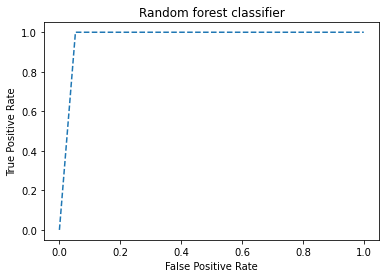

ROC score 0.9736842105263158
F1 score 0.9787941787941788
Precision score 0.9848484848484849
Recall score 0.9736842105263157
Accuracy score is 0.9803921568627451


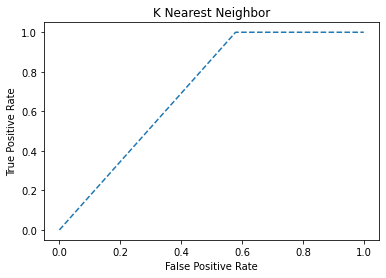

ROC score 0.7105263157894737
F1 score 0.7229629629629629
Precision score 0.872093023255814
Recall score 0.7105263157894737
Accuracy score is 0.7843137254901961


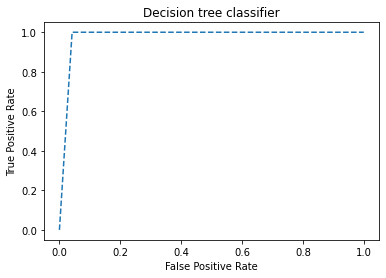

ROC score 0.9791666666666667
F1 score 0.9845997973657548
Precision score 0.9905660377358491
Recall score 0.9791666666666667
Accuracy score is 0.9868421052631579


In [10]:
print("Accuracy score is " + str(RFC(data, last_row)))
print("Accuracy score is " + str(KNN(data, last_row)))
print("Accuracy score is " + str(DTC(data, last_row)))

## Applying Principal Component Analysis for the data

In [11]:
pca = decomposition.PCA(n_components=30, random_state=42)
data_pca = pca.fit_transform(data)
data_pca = pd.DataFrame(data_pca)
data_pca

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,96.734748,102.952038,-27.469969,-25.356689,6.414432,-5.274414,-9.657741,-6.005630,14.317164,8.626174,...,6.874787,-0.460533,-3.252572,-5.812602,9.609411,-4.061969,-6.653150,-4.140352,7.724646,3.923636
1,-114.233546,3.631739,45.296140,-7.865090,14.692470,6.330049,-43.131009,7.257754,-18.958781,10.981137,...,7.822569,2.132434,0.216543,-8.382889,0.604889,1.057860,-8.400749,-4.075317,9.271388,-4.587266
2,94.038621,-29.149770,22.798148,-30.491905,60.439366,35.829741,-6.564339,-11.153734,10.275918,-0.393678,...,-7.986325,1.602640,-1.124718,4.592146,9.241899,2.309868,-9.461655,2.264630,-4.485096,-2.603759
3,-71.076942,43.400423,15.916860,0.979025,21.904741,-11.478502,-8.350189,3.024027,-6.550038,25.472490,...,4.796481,-2.370654,-4.082073,-2.702971,0.630754,1.111114,0.377293,-1.459579,1.555701,0.534767
4,-71.856567,51.669239,-16.482206,-21.149892,33.083721,-26.251549,1.996129,15.607498,18.708037,13.071058,...,1.789604,-7.706522,-0.166047,2.325744,-3.529907,5.716075,-4.217284,3.547655,-6.844512,2.615773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,31.791742,-169.053420,-2.235962,3.109243,-6.800178,29.180138,-10.114321,-4.818434,-7.263541,-5.738875,...,-0.404294,-1.157898,-4.907756,-3.209480,-4.305529,-0.490083,7.204818,2.600781,1.910738,-2.894147
248,31.969316,-170.197602,-21.864370,31.691301,5.496288,9.563612,1.209842,11.097076,-20.213235,8.801824,...,-4.991089,1.702436,2.584240,-2.044183,-1.250032,9.259121,9.782814,-0.151648,3.277729,-1.459923
249,-7.807396,-129.098164,-12.060395,47.428206,-43.273005,-9.964707,1.558374,-4.989359,17.391654,-13.786740,...,15.904621,-6.721936,-12.193196,-4.430417,-0.822585,4.882192,-6.198064,-6.590325,6.581289,-5.159604
250,36.613678,-54.164336,38.748873,-11.074635,-30.628784,21.031849,27.586468,11.304600,-27.977573,-9.685174,...,3.057688,-5.232204,-9.626348,-2.285217,4.591571,5.106668,-2.782291,2.969657,2.431363,1.671643


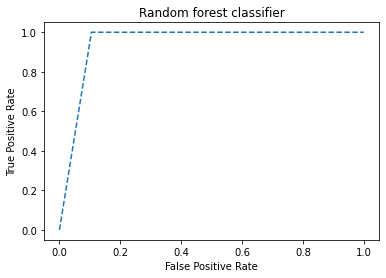

ROC score 0.9473684210526316
F1 score 0.9570707070707071
Precision score 0.9705882352941176
Recall score 0.9473684210526316
Accuracy score is 0.9607843137254902


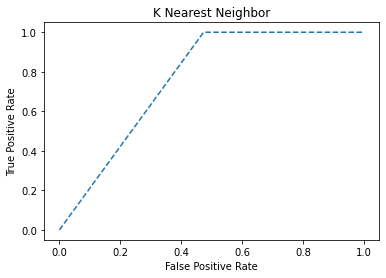

ROC score 0.7631578947368421
F1 score 0.7831837505904582
Precision score 0.8902439024390244
Recall score 0.763157894736842
Accuracy score is 0.8235294117647058


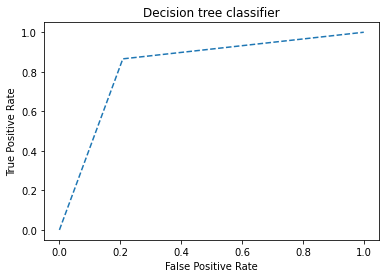

ROC score 0.828525641025641
F1 score 0.8211764705882354
Precision score 0.8153846153846154
Recall score 0.828525641025641
Accuracy score is 0.8421052631578947


In [12]:
print("Accuracy score is " + str(RFC(data_pca, last_row)))
print("Accuracy score is " + str(KNN(data_pca, last_row)))
print("Accuracy score is " + str(DTC(data_pca, last_row)))

## Applying Independent Component Analysis for the data

In [13]:
ica = FastICA(n_components=10, random_state=42)
data_ica = ica.fit_transform(data)
data_ica = pd.DataFrame(data_ica)

C:\Users\Srilahari\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


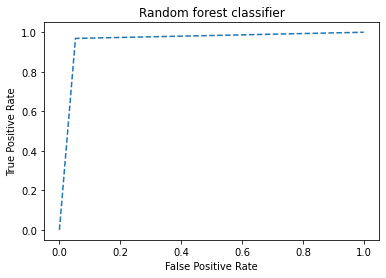

ROC score 0.9580592105263158
F1 score 0.9580592105263157
Precision score 0.9580592105263157
Recall score 0.9580592105263157
Accuracy score is 0.9607843137254902


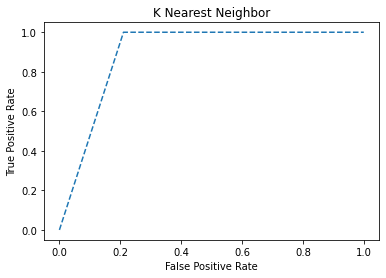

ROC score 0.8947368421052632
F1 score 0.9117647058823529
Precision score 0.9444444444444444
Recall score 0.8947368421052632
Accuracy score is 0.9215686274509803


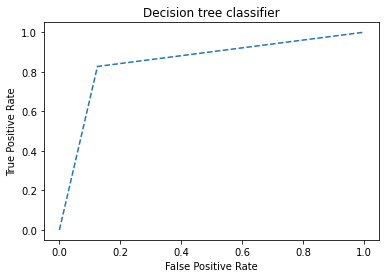

ROC score 0.8509615384615384
F1 score 0.8276643990929704
Precision score 0.817391304347826
Recall score 0.8509615384615384
Accuracy score is 0.8421052631578947


In [14]:
print("Accuracy score is " + str(RFC(data_ica, last_row)))
print("Accuracy score is " + str(KNN(data_ica, last_row)))
print("Accuracy score is " + str(DTC(data_ica, last_row)))

## Applying Mutual Information for the data

In [15]:
mi = sp(percentile=50)
data_mi = mi.fit(data, last_row)
data_mi = mi.transform(data)
data_mi = pd.DataFrame(data_mi)

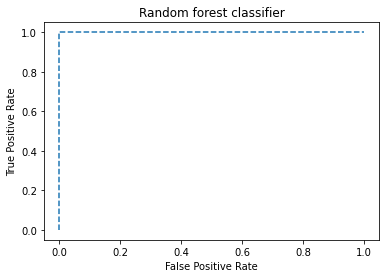

ROC score 1.0
F1 score 1.0
Precision score 1.0
Recall score 1.0
Accuracy score is 1.0


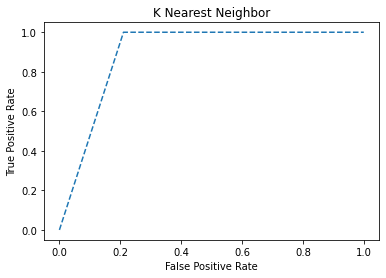

ROC score 0.8947368421052632
F1 score 0.9117647058823529
Precision score 0.9444444444444444
Recall score 0.8947368421052632
Accuracy score is 0.9215686274509803


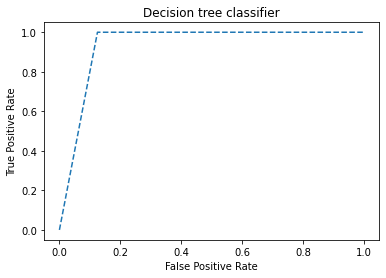

ROC score 0.9375
F1 score 0.9526479750778816
Precision score 0.9727272727272727
Recall score 0.9375
Accuracy score is 0.9605263157894737


In [16]:
print("Accuracy score is " + str(RFC(data_mi, last_row)))
print("Accuracy score is " + str(KNN(data_mi, last_row)))
print("Accuracy score is " + str(DTC(data_mi, last_row)))